# Customer Personality Analysis

Team Name: Data Dudes

Henry Grozier - henrygrozier

Derek Hackenbracht - dhackenbracht1

Raphael Orange - raph

Define the problem, description of topic, research questions you hope to answer, and other elements of Q1.

### Problem
Trouble effectively targetting the appropriate customers for the marketing campaigns.

#### Topic:
Using acquired customer data ranging from income to age to determine who to target with the campaign and on what platform to present it.

#### Research Question:
1. Which demographic should we target for a specific type of product? (Wine)

#### Follow up Questions for Part 3
1. Did married couples spend the most on wine because they are the majority?

2. Did people with 0 kids home spend the most on wine because they are the majority?

3. What differentiates the clusters in the MDS graph?

For the Research Question we will use:
- Age, marital status, kids at home, income, date of customer enrollment

Follow ups for Part 3 use:
- mean for married couples instead of sum, mean for kids home instead of sum, and switch up mds and clustering order then investigate clusters


## Processing and Cleaning

In [ ]:
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)    

data = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

#Z_CostContact and Z_Revenue columns are meaningless, so they are dropped
#Could potentially drop the complaint column, as there are only 21 complaints
data = data.drop(["Z_CostContact", "Z_Revenue"], axis=1)

#Changes Dt_Customer to a datetime object from a string so comparison will work as expected
dates = []
for date in data.Dt_Customer:
  str_date = date.split('-')
  dates.append(datetime.datetime(int(str_date[2]), int(str_date[1]), int(str_date[0])))
data.Dt_Customer = dates

In [ ]:
data.to_csv("marketing_campaign_clean.csv")
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0


### Description
The data we gathered includes categories such as demographic information, amount spent on certain products, information on where customers buy their products, and the successes of previous marketing campaigns.

The demographic information includes columns such as year of birth, education level, marital status, income, presence of a kid at home, and recency, which is measured as the number of days since the customer's last purchase.

The amount spent on certain products covers wines, meats, fruits, fish, sweets, and gold products for the past 2 years. 

The information on where people make purchases includes the number of web purchases, store purchases, deal purchases, and catalog purchases, as well as how many web visits they have per month.

The columns on previous marketing campaigns denote the success of 1 of 5 marketing campaigns with the customers, with a 1 meaning success, along with a column for response to last campaign and a column denoting whether the customer had a complaint. 


## Analysis

We will begin by examining our research question :

Which demographic should we target our campaign for selling wine?

We will examine the correlation between the amount of wine bought and factors about the customer including:

Age, marital status, kids at home, income, date of customer enrollment

We began with comparing the year the customer was born to the amount of wine bought, however the scatterplot below shows that there is no correlation. Therefore we will not be using this.

Wine Amount: 303.9357142857143
Meat Amount: 166.95
Fruits Amount: 26.302232142857143
Fish Amount: 37.52544642857143
Sweets Amount: 27.06294642857143
Gold Products Amount: 44.021875


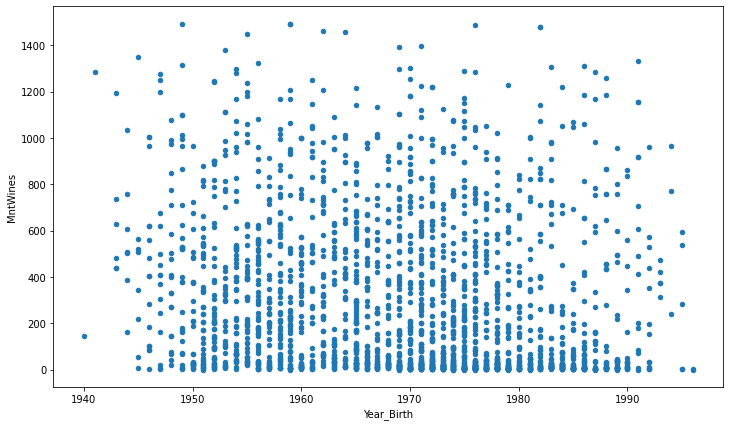

In [ ]:
# We chose to analyze wine, because it was the most popular product
print("Wine Amount: " + str(data.MntWines.mean()))
print("Meat Amount: " + str(data.MntMeatProducts.mean()))
print("Fruits Amount: " + str(data.MntFruits.mean()))
print("Fish Amount: " + str(data.MntFishProducts.mean()))
print("Sweets Amount: " + str(data.MntSweetProducts.mean()))
print("Gold Products Amount: " + str(data.MntGoldProds.mean()))

#Gets rid of outliers
data = data[data.Income < 600000]
data = data[data.Year_Birth > 1920]
wineData = data.iloc[:, 0:9]
# wineData = wineData.drop([11004, 1150, 7829], axis=0)

wineData.plot.scatter(x='Year_Birth', y='MntWines', figsize=(12,7))

Next, we wanted to find any correlation between the amount of wine bought and the marital status of the customer.

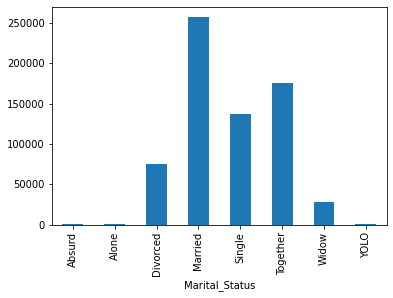

In [ ]:
#Marital status totals spent on wine
g0 = data.groupby("Marital_Status")
g0.sum().MntWines.plot.bar()

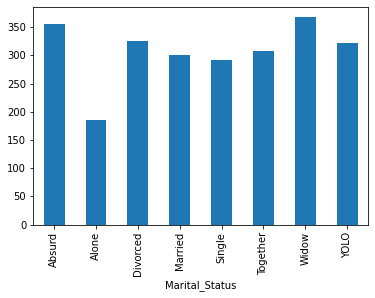

In [ ]:
g0.mean().MntWines.plot.bar()

These bar charts determine that married couples spend the most on wine, however, they do not spend the most on average, but because they are the majority. Still, this is a good reason to focus on married couples, although this is perhaps not by itself the primary demographic to focus on. 

Furthermore, we want to determine any correlation between kids at home and amount of wine bought. After observing this bar chart of the mean amount of wine bought for each amount of kids, we observe there is a correlation between customers have 0 kids and buying more wine.

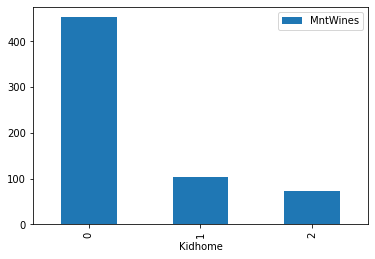

In [ ]:
# Amount of kids at home, mean amount of wine bought
g = wineData.groupby('Kidhome').mean()
g.iloc[:,4:5].plot.bar()

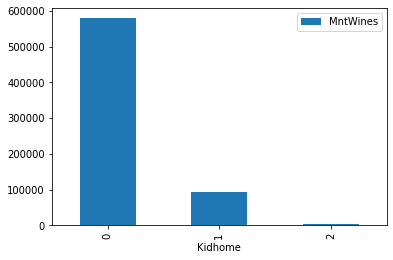

In [ ]:
g = wineData.groupby('Kidhome').sum()
g.iloc[:,4:5].plot.bar()


It appears from the bar charts above that the majority of people buying wine are people with no kids home, as well as the largest wine amount per person. We should definitely target people with 0 kids home for this campaign. 

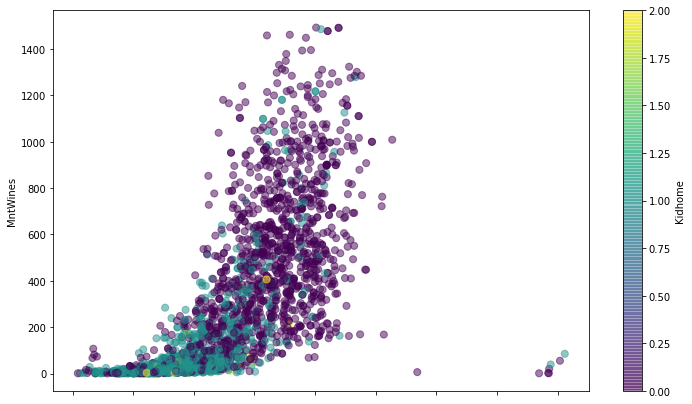

In [ ]:
#Plotting the relationship between income and amount spent on wine with the color representing the number of kids the buyer has at home
data.plot.scatter(x='Income', y='MntWines', c='Kidhome', colormap='viridis', figsize=(12, 7), alpha=0.50, s=50)

Furthermore, this scatterplot displays that customers with higher incomes as well as no kids spend the most on wine. 

With the use of the knowledge above, we want to see if other marital statuses who have no kids at home would be a good demographic to target. However, we were able to observe the amount of wine is very similar for each marital status, thus this is not going to be a good demographic to target. 

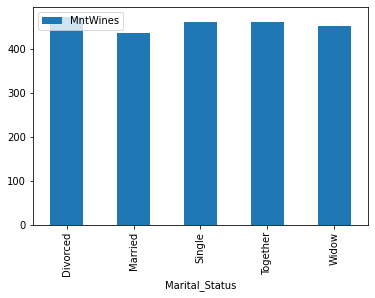

In [ ]:
# Average amount of wine bought per marital status for customers with no kids at home
wineKids0 = wineData[wineData['Kidhome'] == 0]

gb = wineKids0.groupby('Marital_Status').mean()
gb.loc[['Divorced', 'Married', 'Single', 'Together', 'Widow'],['MntWines']].plot.bar()

We will now try to determine a correlation between the amount of wine bought and the educational status of the customer.

In [ ]:
# Grouping the educational statuses
g1 = data.groupby("Education")
print(g1.size())
g1.mean()

Education
2n Cycle       198
Basic           54
Graduation    1115
Master         365
PhD            480
dtype: int64


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Education,,,,,,,,,,,,,,,,,,,,,,,
2n Cycle,1972.792929,47625.333333,0.474747,0.409091,48.383838,202.757576,29.626263,136.378788,48.454545,35.055556,47.217172,2.272727,3.787879,2.373737,5.595960,5.469697,0.075758,0.045455,0.050505,0.070707,0.010101,0.015152,0.111111
Basic,1977.462963,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037
Graduation,1969.629596,52169.749776,0.440359,0.492377,49.904036,285.293274,30.876233,180.539013,43.448430,31.313004,50.718386,2.310314,4.116592,2.739910,5.843946,5.284305,0.069955,0.070852,0.077130,0.071749,0.014350,0.012556,0.136323
Master,1966.947945,52917.534247,0.457534,0.534247,47.317808,332.980822,21.375342,162.920548,31.493151,20.808219,40.189041,2.424658,4.035616,2.545205,5.887671,5.205479,0.065753,0.084932,0.073973,0.049315,0.005479,0.005479,0.153425
PhD,1966.183333,56088.258333,0.397917,0.602083,48.585417,406.497917,19.887500,168.920833,26.716667,20.256250,32.004167,2.362500,4.433333,2.981250,6.077083,5.260417,0.083333,0.093750,0.079167,0.062500,0.020833,0.002083,0.210417


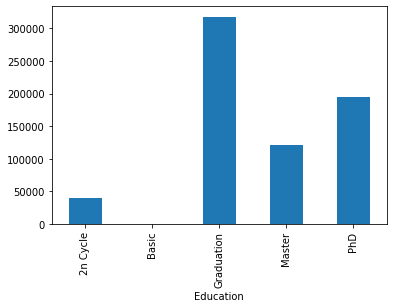

In [ ]:
#Gross amount spent on wine for each education level
g1.sum().MntWines.plot.bar()

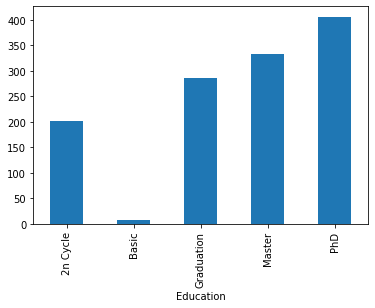

In [ ]:
#Amount spent on wine per education level per person
g1.mean().MntWines.plot.bar()

These bar graphs show that college graduates spent the most on wine overall, and PhD students have spent the most per customer. Therefore, we will target these two statuses.

We will now implement k-means clustering to find more correlation between different groups and amount of wine purchased.

In [ ]:
# Dropping an unnecessary column and outliers
import sklearn.cluster as cl
import sklearn.metrics.pairwise as pairs
import matplotlib.pyplot as plt
import sklearn.manifold as mani
%matplotlib inline

data = data.iloc[:, :9]
data = data.dropna()
data = data.drop("Dt_Customer", axis=1)
data = data[(data.Income < 600000)]


In [ ]:
# Giving marital statuses a numerical quality
data = data.rename(columns={'Marital_Status': 'Marital'})
data.Marital.replace("Absurd", 0 ,inplace=True)
data.Marital.replace("YOLO", 1 ,inplace=True)
data.Marital.replace("Divorced", 2 ,inplace=True)
data.Marital.replace("Alone", 3 ,inplace=True)
data.Marital.replace("Single", 4 ,inplace=True)
data.Marital.replace("Married", 5, inplace=True)
data.Marital.replace("Divorced", 6,inplace=True)
data.Marital.replace("Together", 7,inplace=True)
data.Marital.replace("Widow", 8 ,inplace=True)









In [ ]:
# Giving educational status a numerical quality.
data.Education.replace("Basic", 0, inplace=True)
data.Education.replace("2n Cycle", 1, inplace=True)
data.Education.replace("Graduation", 2, inplace=True)
data.Education.replace("Master", 3, inplace=True)
data.Education.replace("PhD", 4, inplace=True)

In [ ]:
# Normalize the dataset
normDF = (data - data.mean()) / data.std()
normDF

,Year_Birth,Education,Marital,Income,Kidhome,Teenhome,Recency,MntWines
ID,,,,,,,,
5524,-1.018122,-0.458746,-0.680583,0.287040,-0.822568,-0.929488,0.310283,0.977439
2174,-1.274497,-0.458746,-0.680583,-0.260823,1.039786,0.907892,-0.380727,-0.872421
4141,-0.334455,-0.458746,1.205158,0.912990,-0.822568,-0.929488,-0.795334,0.357854
6182,1.289255,-0.458746,1.205158,-1.175848,1.039786,-0.929488,-0.795334,-0.872421
5324,1.032880,1.532904,-0.052003,0.294240,1.039786,-0.929488,1.554102,-0.392169
...,...,...,...,...,...,...,...,...
10870,-0.163538,-0.458746,-0.052003,0.430347,-0.822568,0.907892,-0.104323,1.196813
4001,-1.958164,1.532904,1.205158,0.559996,2.902140,0.907892,0.241182,0.298564
7270,1.032880,-0.458746,-1.937744,0.233294,-0.822568,-0.929488,1.450450,1.786752


In [ ]:
# Metric distance between customers
normHD = pairs.manhattan_distances(normDF.iloc[:, :-1])
normHD = pd.DataFrame(normHD, columns=normDF.index, index=normDF.index)
normHD.head()

ID       5524      2174      4141      6182      5324       7446       965    \
ID                                                                             
5524  0.000000  5.194983  4.300976  8.623977  7.784605   7.227884   5.236443   
2174  5.194983  0.000000  8.113937  7.616506  9.254880   7.366085   5.142102   
4141  4.300976  8.113937  0.000000  5.574901  9.446685   3.772347   6.511659   
6182  8.623977  7.616506  5.574901  0.000000  7.324710   8.159976   9.576617   
5324  7.784605  9.254880  9.446685  7.324710  0.000000  10.040109  10.628212   

ID       6177      4855       5899       387        2125       8180   \
ID                                                                     
5524  8.920371  9.830789  10.959141   6.630762   2.484676   6.609251   
2174  7.912900  8.823318   7.146180  10.730019   7.679659   3.546510   
4141  8.800224  6.781714  11.488634   8.307242   5.989047  10.451749   
6182  3.857823  3.260195   9.161152   7.824382  10.766820  11.163016   
5324  3.637804  5.744640   9.087567   9.841685   8.254622   8.663099   

ID       2569       2114      9736       4939       6565       2278   \
ID                                                                     
5524  5.779310   5.286577  7.292333   5.085317   6.161579   7.348437   
2174  8.496545   8.586788  3.508414   7.289802   7.169050   7.722986   
4141  6.073769   6.124419  8.485106   3.403576   7.953493  10.282078   
6182  4.223575  11.699321  5.006405   5.833351  13.528395   5.372936   
5324  8.204750   9.073482  6.163983  11.612761   8.402638   5.371502   

ID       9360      5376       1993       4047       1409      7892      2404   \
ID                                                                              
5524  4.332459  7.510824   5.335817   7.051725   5.426481  3.933725  8.039750   
2174  7.256997  6.779757   6.343289   6.677176   5.338227  8.032981  4.009249   
4141  4.834221  8.081687   8.336059   7.216688   5.955973  6.867366  7.504996   
6182  4.291519  3.361370  12.702633  12.207308   8.657869  7.580924  5.779211   
5324  6.757899  6.553391   7.520055   9.581469  11.193813  7.525195  7.595067   

ID       9422       1966       6864      3033       5710       7373   \
ID                                                                     
5524  7.249961   5.846885   8.007530  4.370082   6.584048   9.613896   
2174  6.242490  11.041867  10.724766  8.331136   5.626523   8.168334   
4141  6.715208   6.271465   9.282746  3.735871   3.880478  11.703639   
6182  2.228600  11.846366   7.432552  6.245545   5.714689  14.955627   
5324  5.950694   4.521656   9.698481  7.880375  10.889573  13.415201   

ID        8755      10738      4339      10755     8595       2968      8601   \
ID                                                                              
5524   4.918812  5.718375   6.722193  7.331280  7.865334   5.044882  7.347843   
2174   8.219023  1.981008   6.860394  7.705829  8.289830   8.527808  7.486044   
4141   4.774122  9.812048   6.091428  9.007760  7.027492   9.000352  5.561189   
6182  10.074395  9.597513  10.415968  4.800193  8.523708  12.469553  8.572338   
5324   9.440206  7.786623   7.030018  5.642778  9.170471   8.846187  9.929799   

ID        503        8430      2139      1371       9909      7286   \
ID                                                                    
5524   8.661756   7.267836  8.724752  3.120225   8.484273  6.625144   
2174   9.036305   6.310311  7.717281  8.315208  11.201508  6.999694   
4141  10.338236   5.586095  8.189999  4.801966   7.949519  5.787302   
6182   4.763334   6.983320  4.153349  8.496783   6.099325  4.348269   
5324   3.297808  13.795280  6.459336  6.675595  10.909713  5.198360   

ID        6566       8614      4114      1331      2225      9381      6260   \
ID                                                                             
5524   7.902276   5.695002  5.133182  4.747849  4.240021  6.540029  4.282427   
2174   3.872120   5.833203  8.946144  4.845994  9.

In [ ]:
# Creating coordinates
mds = mani.MDS(dissimilarity='precomputed')
data2D = mds.fit_transform(normHD)
data2D = pd.DataFrame(data2D, index=normHD.index, columns=['x','y'])
data2D.head()


,x,y
ID,,
5524,0.932305,2.541704
2174,0.450108,-3.986131
4141,1.149759,3.492495
6182,-6.024407,-0.123942
5324,-5.020627,1.930125


In [ ]:
# Setting up clusters
km = cl.KMeans(n_clusters = 4)
labels = km.fit_predict(data2D)
normDF['CID'] = labels
normDF.head()

,Year_Birth,Education,Marital,Income,Kidhome,Teenhome,Recency,MntWines,CID
ID,,,,,,,,,
5524,-1.018122,-0.458746,-0.680583,0.287040,-0.822568,-0.929488,0.310283,0.977439,2
2174,-1.274497,-0.458746,-0.680583,-0.260823,1.039786,0.907892,-0.380727,-0.872421,3
4141,-0.334455,-0.458746,1.205158,0.912990,-0.822568,-0.929488,-0.795334,0.357854,2
6182,1.289255,-0.458746,1.205158,-1.175848,1.039786,-0.929488,-0.795334,-0.872421,0
5324,1.032880,1.532904,-0.052003,0.294240,1.039786,-0.929488,1.554102,-0.392169,0


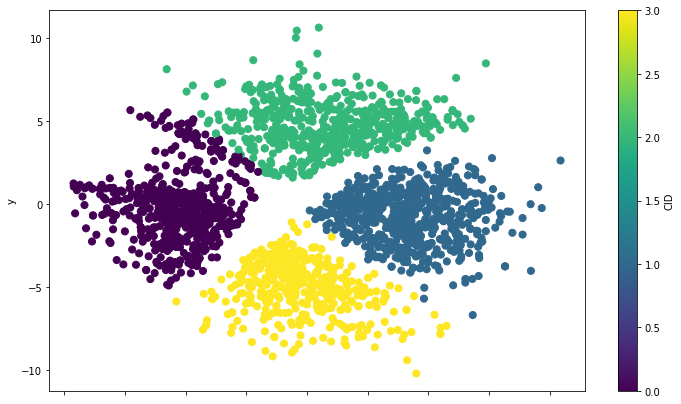

In [ ]:
# Plotting clusters
data2D['CID'] = labels
ax = data2D.plot.scatter(x='x', y='y', c='CID',  s=50, cmap='viridis', figsize=(12, 7))

This k-means graph shows there are four different groups of wine customers. We will now group these values and put them into a dataset; then we will recognize who to target. 

In [ ]:
# Added the cluster labels to the original dataframe and grouped by cluster
data['CID'] = labels
grouped = data.groupby('CID')
grouped.mean()

,Year_Birth,Education,Marital,Income,Kidhome,Teenhome,Recency,MntWines
CID,,,,,,,,
0,1978.772964,2.152513,5.003466,32135.793761,0.915078,0.000000,48.630849,75.272097
1,1963.829953,2.620905,5.152886,58402.430577,0.000000,1.046802,48.984399,422.976599
2,1967.239859,2.520282,5.072310,70876.065256,0.001764,0.000000,49.352734,540.968254
3,1965.444965,2.557377,5.098361,43952.807963,1.049180,1.049180,49.154567,126.480094


In [ ]:
# Dropped the columns which all had very similar values
df = pd.DataFrame(grouped.mean().drop(['Education', 'Marital', 'Recency'], axis=1).round())
df['Age'] = 2021 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)
df

,Income,Kidhome,Teenhome,MntWines,Age
CID,,,,,
0,32136.0,1.0,0.0,75.0,42.0
1,58402.0,0.0,1.0,423.0,57.0
2,70876.0,0.0,0.0,541.0,54.0
3,43953.0,1.0,1.0,126.0,56.0


After cleaning the dataset, we noticed the best demographic to target were couples with no kids or couples with teens as they have much higher amounts of wine purchased compared to the rest.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f267a4390>,
      dtype=object)

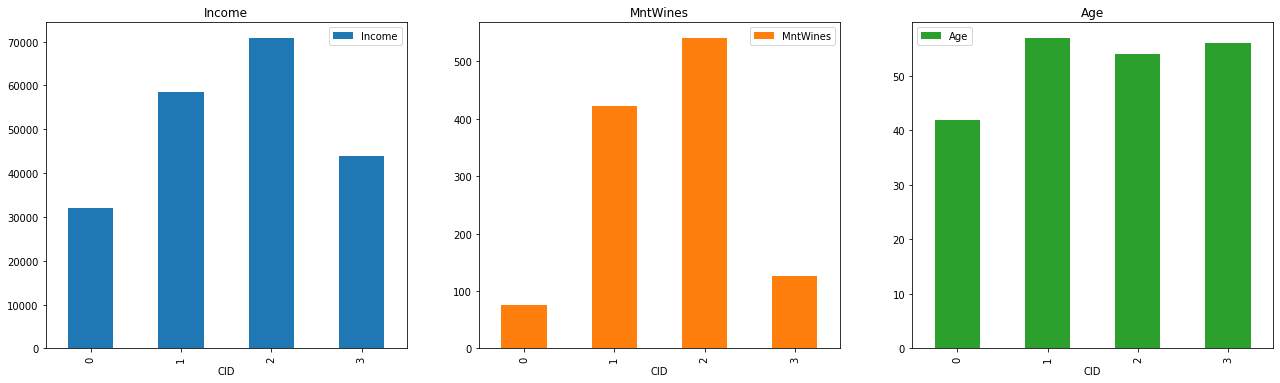

In [ ]:
# dropped the kids and teen data, then plotted the income, amount of wine, and age for each cluster
df = df.drop(['Kidhome', 'Teenhome'], axis = 1)
fig, axes = plt.subplots(nrows=1,ncols=3, figsize= (22, 6))
df.plot.bar(ax = axes, subplots=True)

These bar graphs visualize each k-means cluster. They show that clusters 1 and 2 are married couples with the most income that spend more on wine than the other groups because they both have less children than the other groups. We use these demographics as targets for wine.:

# Conclusion

Based on the data and charts we have gathererd above, the best demographics to target for wine products are married couples with more income and 0 kids or one teen, PhD students, or graduate students. We also discovered that in order to properly execute k-means, we had to reduce the dimensons of the original dataset and the amount of clusters. 

### Changes from Part 1

Deleted research question 4

Chose wines as the product to examine for research question 1


### Changes from Part 2

Deleted Research Questions 2 and 3

Added more visuals about married couple wine purchases
Created new k-means cluster
Added dataset and visuals to interpret k-means cluster


# Credits

Henry Grozier - Developed the problem statement, topic,and research questions 1 and 2. Then constructed plots for amount of wine versus birth year, amount of wine versus kids at home, amount of wine bought per marital status for customers with no kids at home, added descriptions for some of the graphs. Created the new cluster plot and the three side-by-side plots for the income, amount of wine, and age relative to each cluster.

Raphael Orange - Developed the problem statement and organized the columns for each research question. Created the k-means cluster and wrote analysis for some of the marital and educational graphs, and the conclusion. Added analysis for marital visuals and finalized the conclusion.

Derek Hackenbracht - Added description of data, research question 3 and 4, and cleaned Dt_Customer and 'Z' columns. Examined the correlation with education and the amount of wine bought and created the visualization correlating income and amount of wine bought, with coloring by number of kids at home. Added visualizations showing relationship between marital status and wine bought, and kids home and wine bought. Helped interpret the clusters.